In [ ]:
!pip install scikit-learn

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("F:\\0.0.7. The Data Psychology\\12. Machine Learning\\logistic regression\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


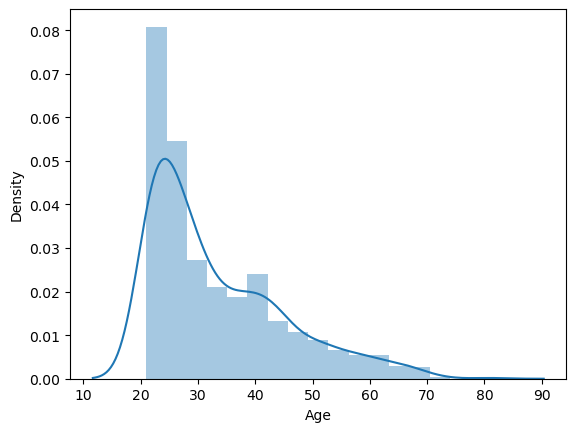

In [10]:
sns.distplot(data['Age']) ;

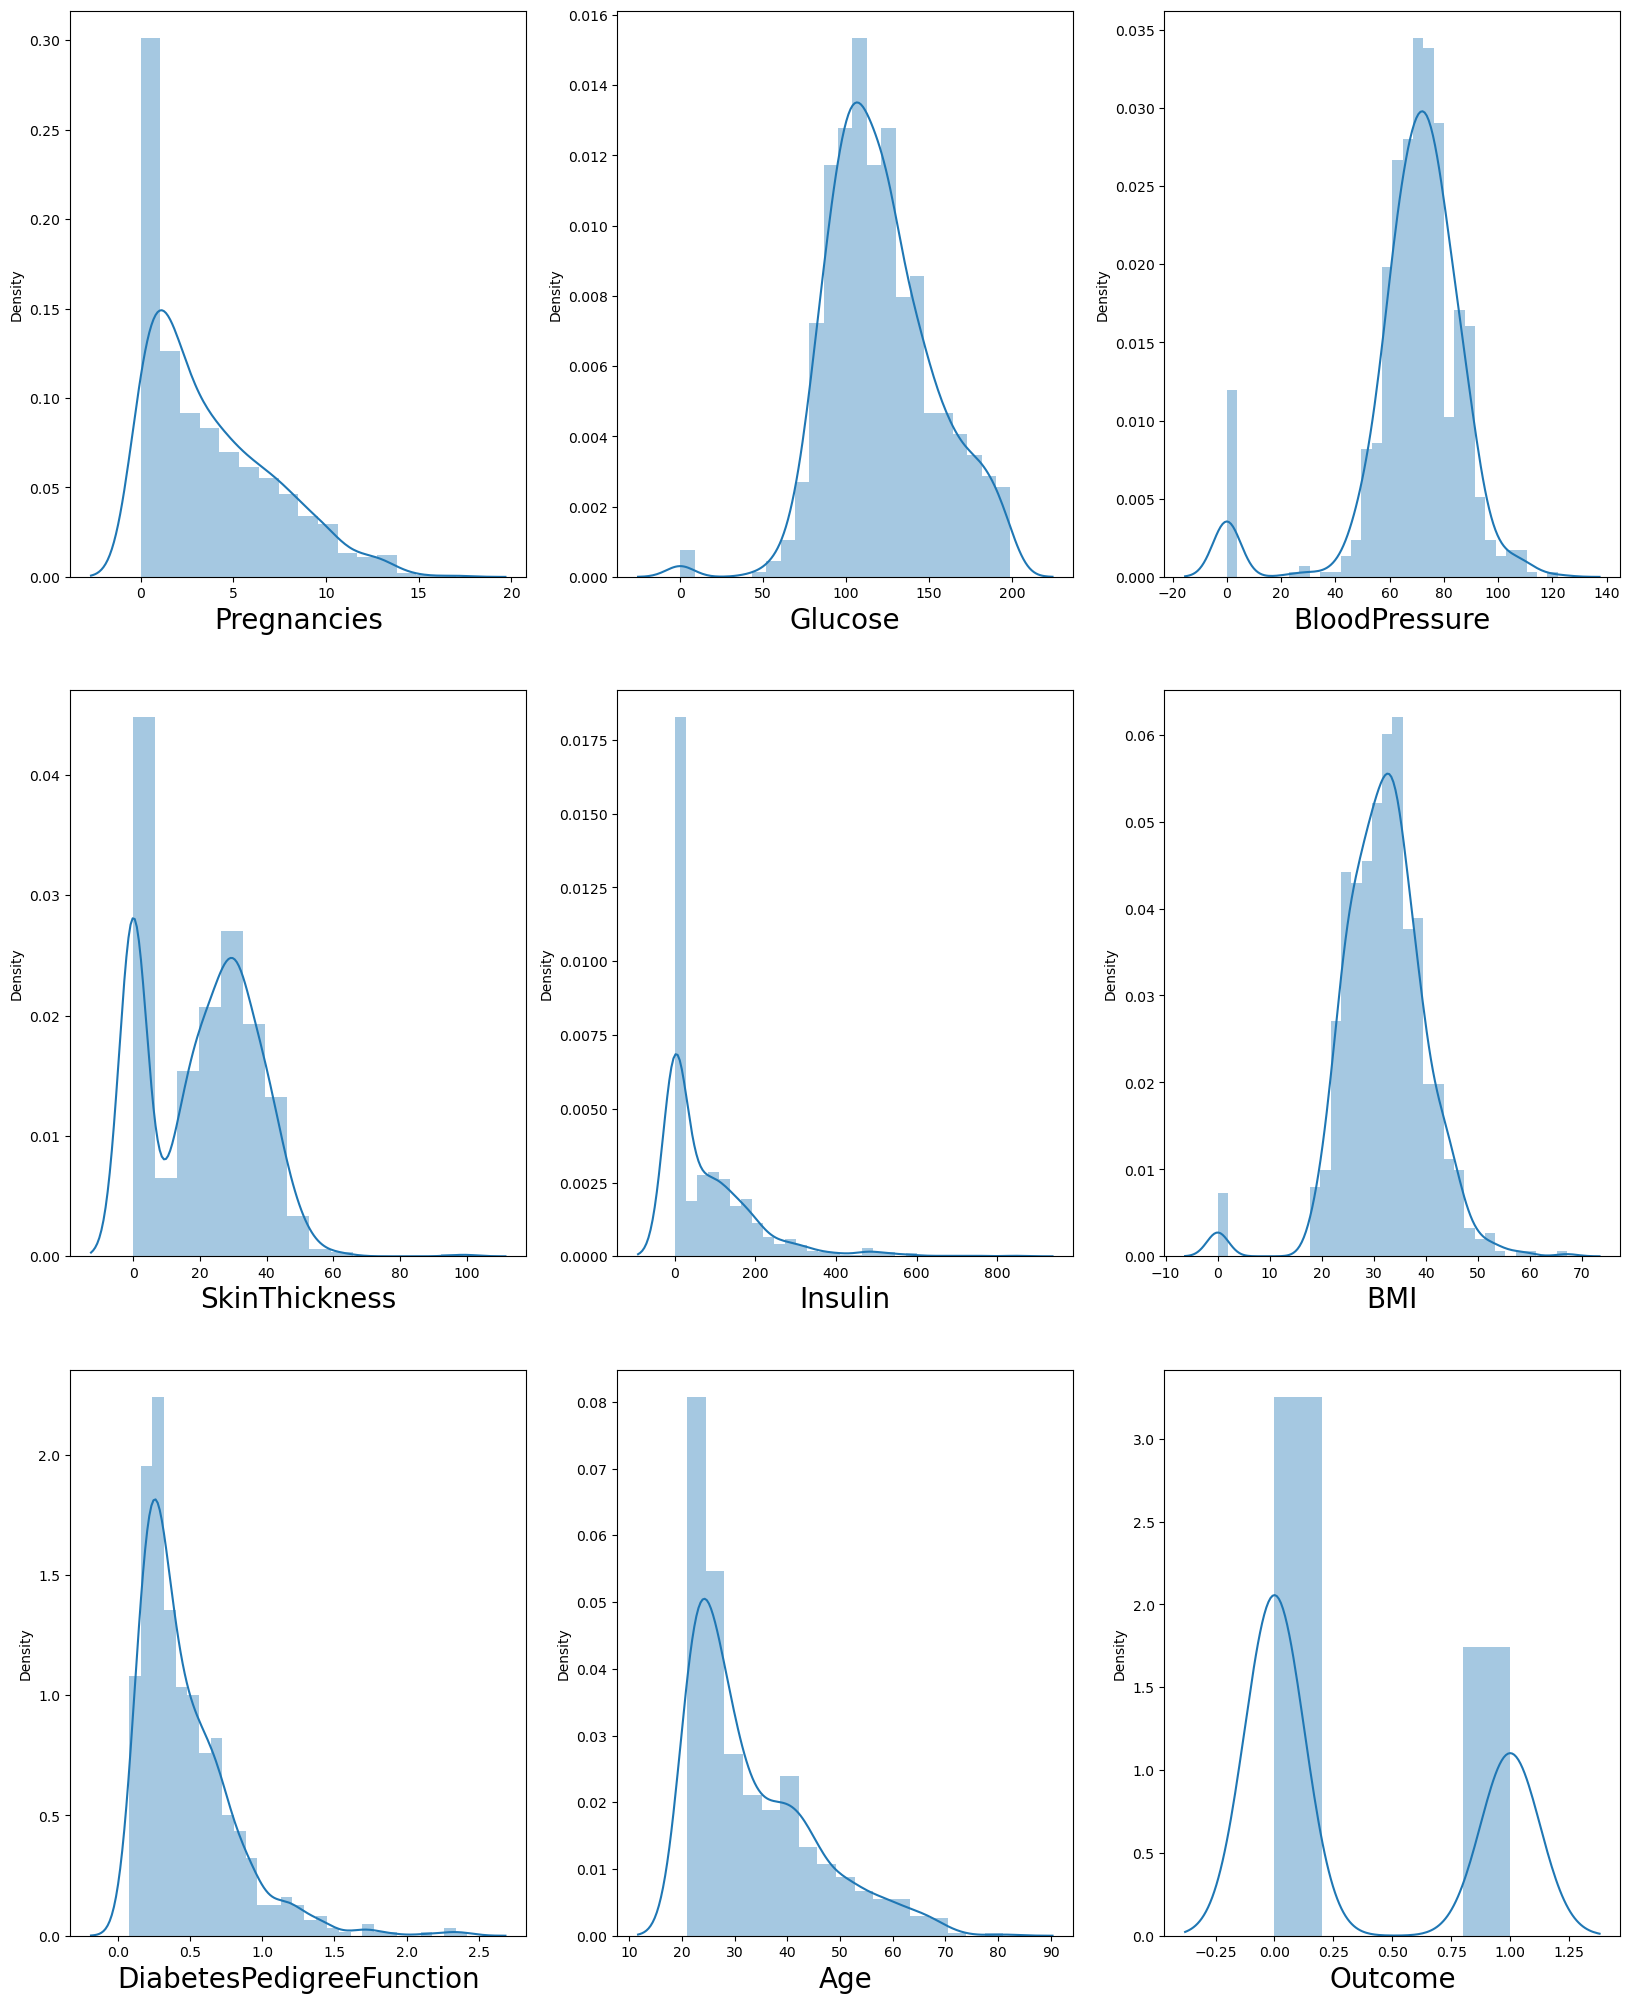

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
data['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [13]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

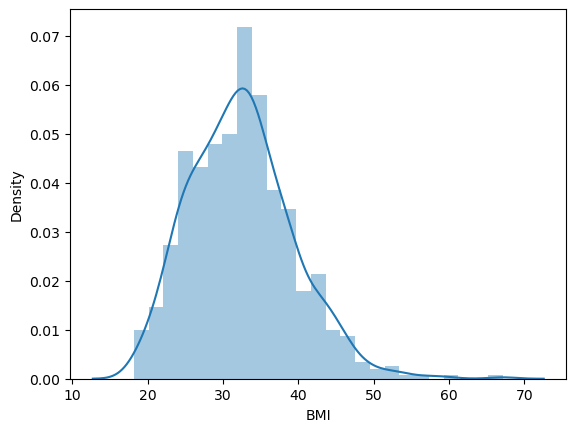

In [14]:
sns.distplot(data['BMI']) ;

In [15]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

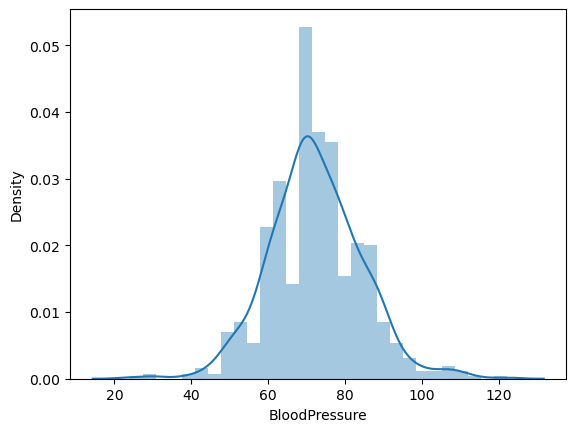

In [16]:
sns.distplot(data['BloodPressure']) ;

In [17]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

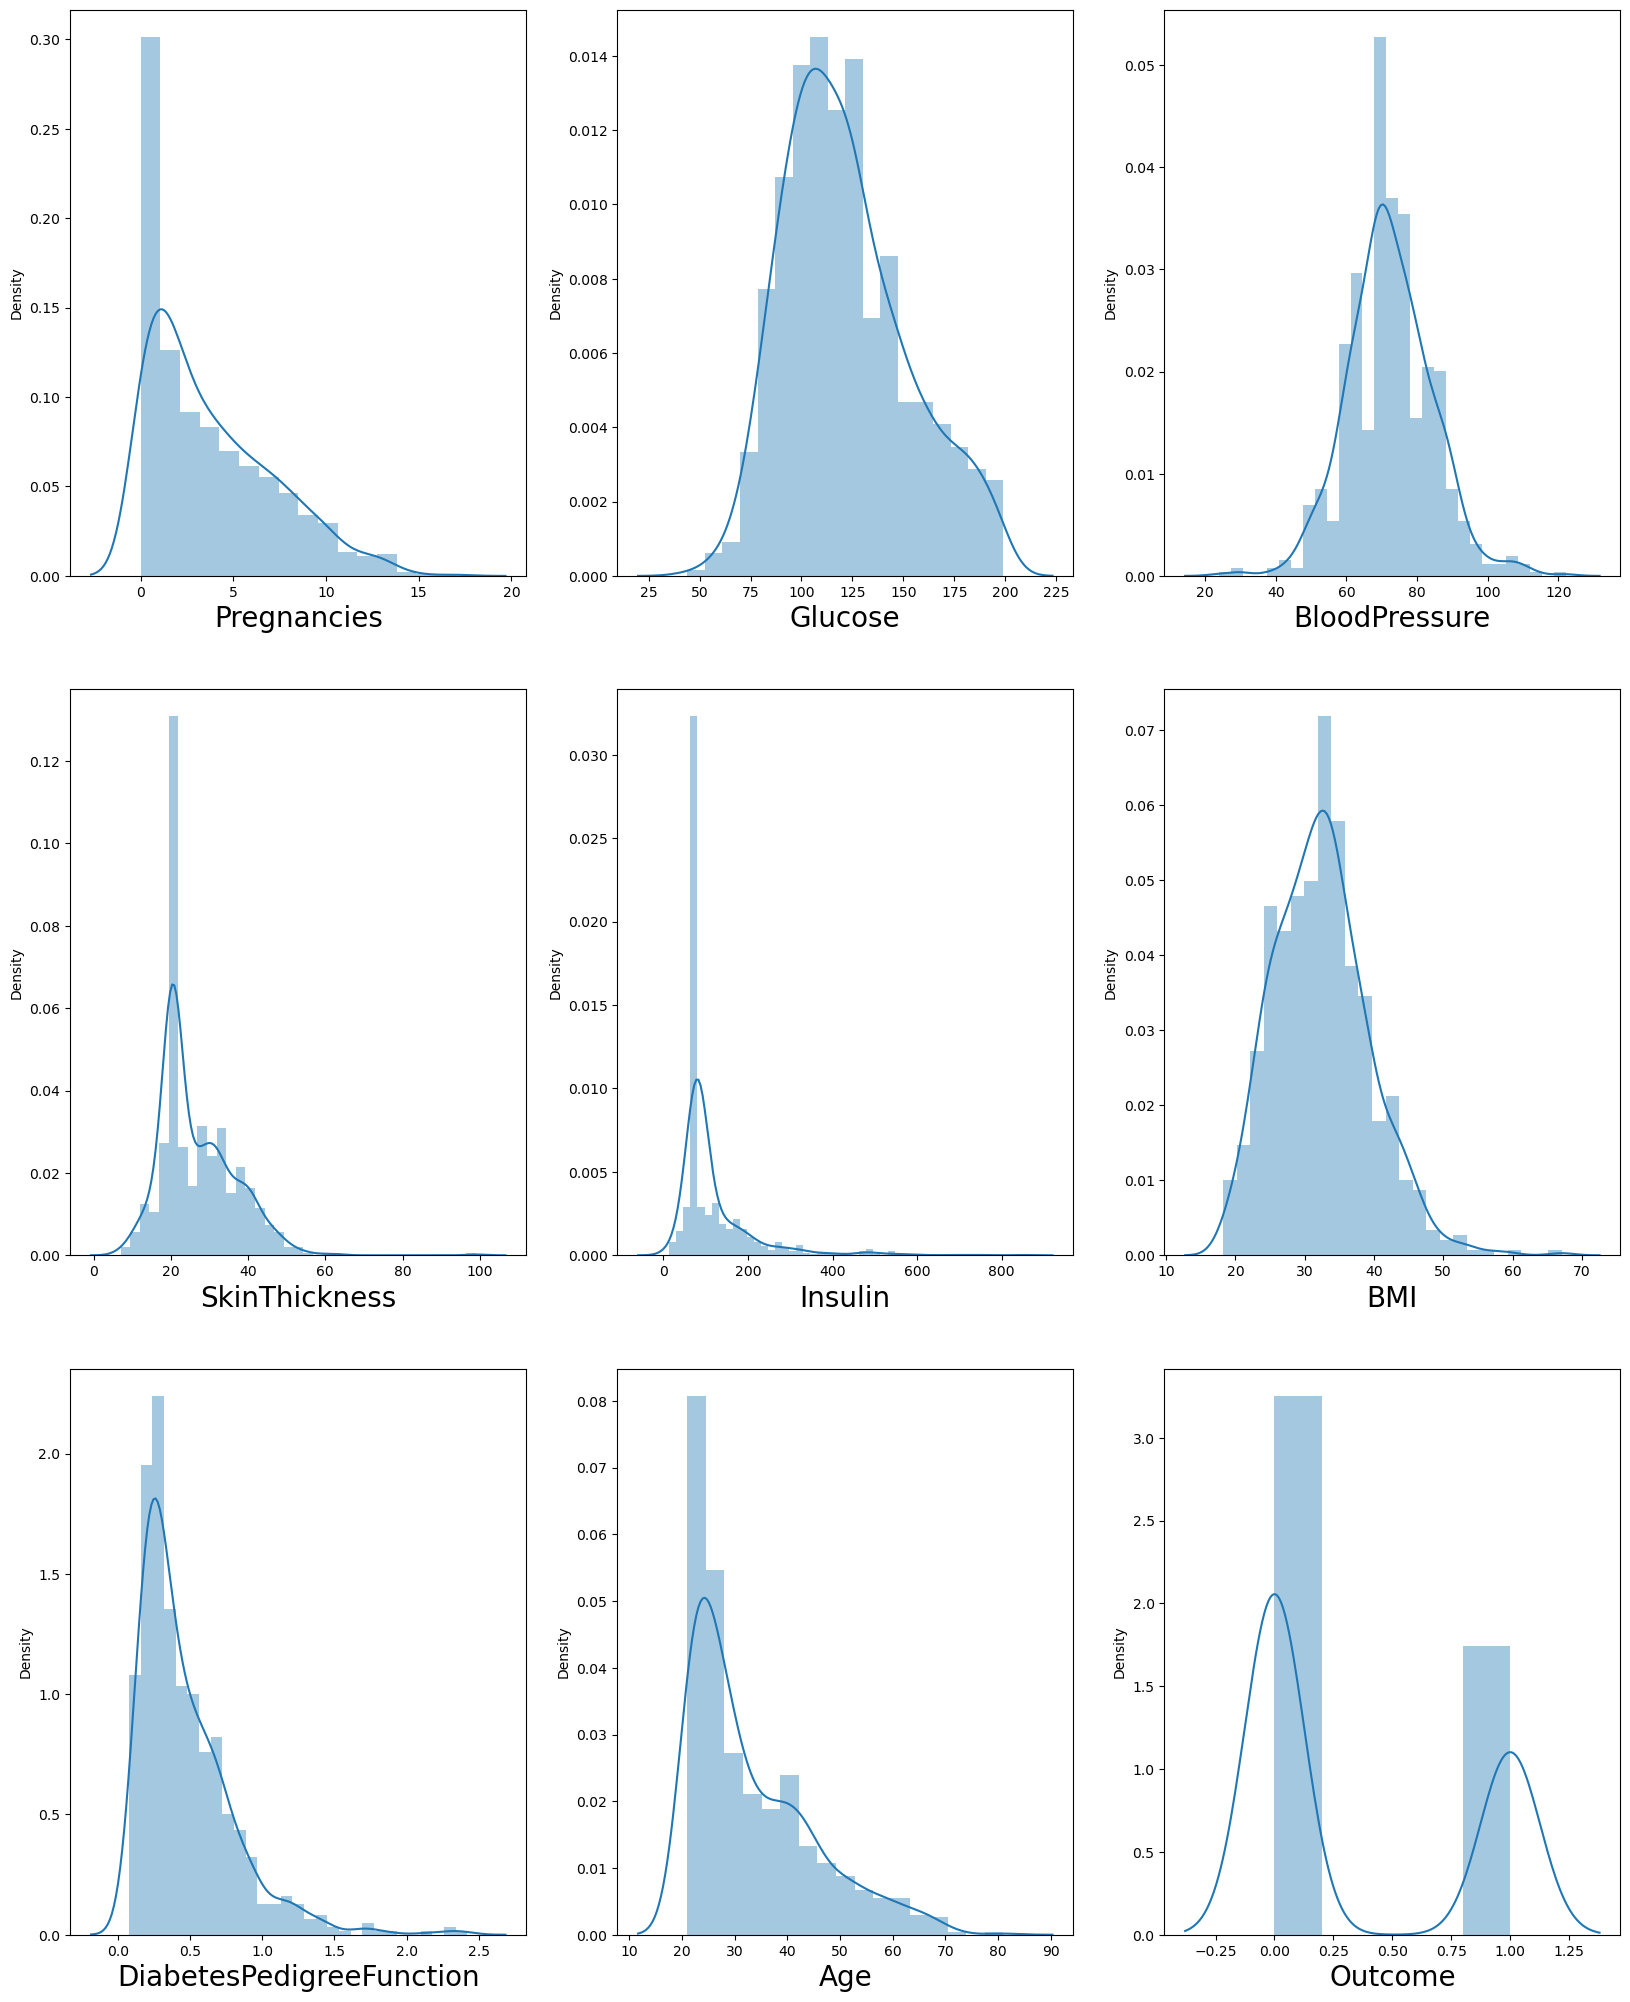

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

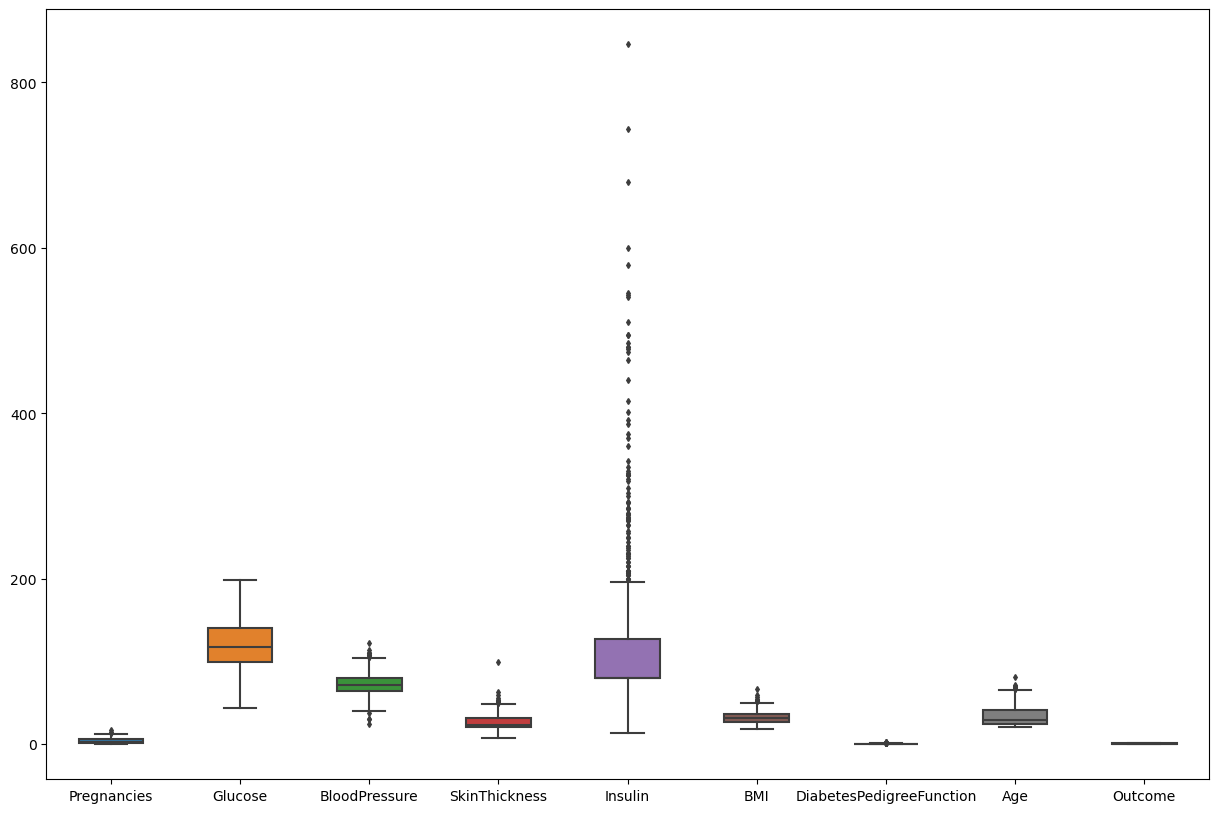

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [20]:
data.shape

(768, 9)

In [21]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]


q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]


q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]


q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [22]:
data_cleaned.shape

(674, 9)

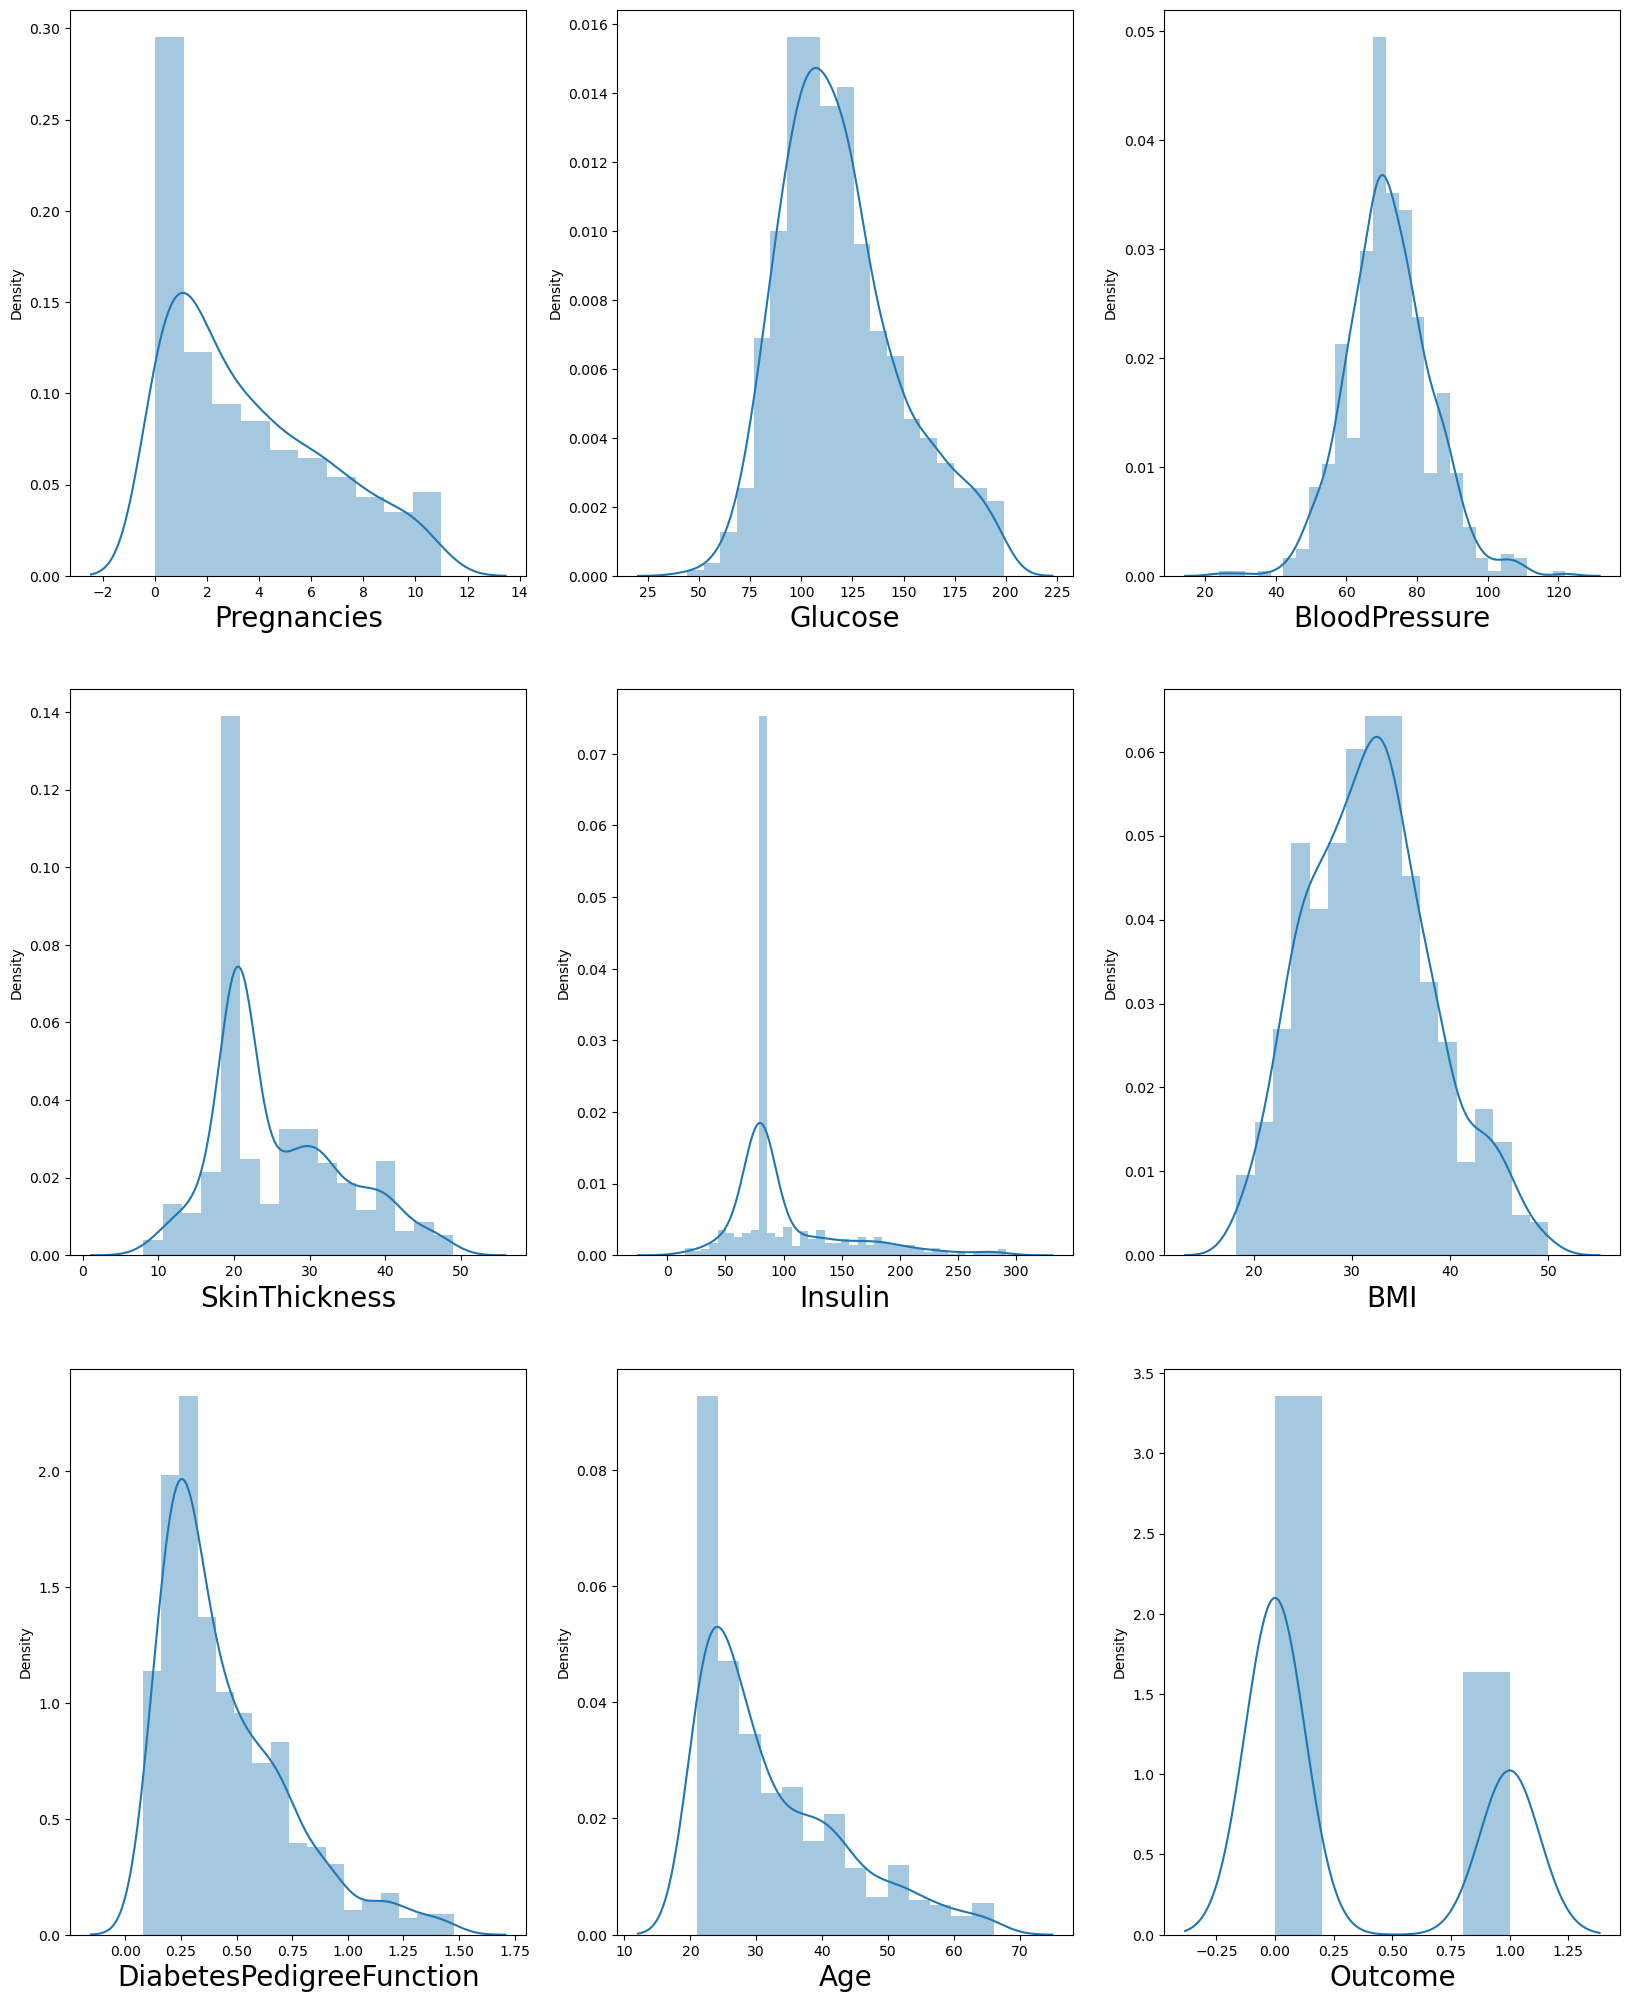

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

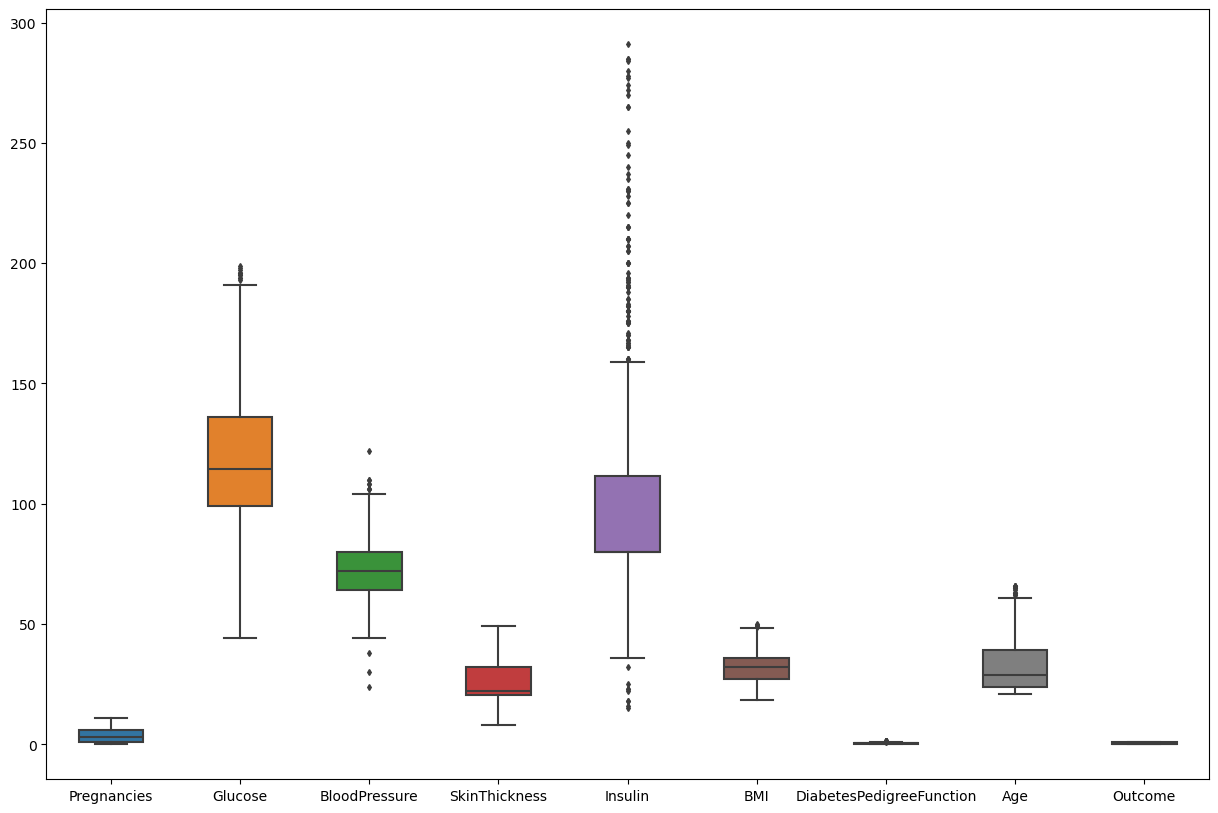

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [25]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [26]:
x = data_cleaned.drop(columns = ['Outcome'])

y = data_cleaned['Outcome']

In [27]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [28]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25, random_state = 355)

In [30]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
97,1,71.0,48.0,18.000000,76.000000,20.4,0.323,22
629,4,94.0,65.0,22.000000,79.799479,24.7,0.148,21
460,9,120.0,72.0,22.000000,56.000000,20.8,0.733,48
457,5,86.0,68.0,28.000000,71.000000,30.2,0.364,24
190,3,111.0,62.0,20.536458,79.799479,22.6,0.142,21
...,...,...,...,...,...,...,...,...
61,8,133.0,72.0,20.536458,79.799479,32.9,0.270,39
335,0,165.0,76.0,43.000000,255.000000,47.9,0.259,26
571,2,130.0,96.0,20.536458,79.799479,22.6,0.268,21
400,4,95.0,64.0,20.536458,79.799479,32.0,0.161,31


In [31]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
210,2,81.0,60.0,22.000000,79.799479,27.7,0.290,25
391,5,166.0,76.0,20.536458,79.799479,45.7,0.340,27
162,0,114.0,80.0,34.000000,285.000000,44.2,0.167,27
588,3,176.0,86.0,27.000000,156.000000,33.3,1.154,52
70,2,100.0,66.0,20.000000,90.000000,32.9,0.867,28
...,...,...,...,...,...,...,...,...
319,6,194.0,78.0,20.536458,79.799479,23.5,0.129,59
526,1,97.0,64.0,19.000000,82.000000,18.2,0.299,21
581,6,109.0,60.0,27.000000,79.799479,25.0,0.206,27
496,5,110.0,68.0,20.536458,79.799479,26.0,0.292,30


In [32]:
y_train

97     0
629    0
460    0
457    0
190    0
      ..
61     1
335    0
571    0
400    1
733    0
Name: Outcome, Length: 505, dtype: int64

In [33]:
y_test

210    0
391    1
162    0
588    1
70     1
      ..
319    1
526    0
581    0
496    0
352    0
Name: Outcome, Length: 169, dtype: int64

In [34]:
scalar = StandardScaler()

In [35]:
x_scaled = scalar.fit_transform(x_train)

In [36]:
x_scaled

array([[-0.87252578, -1.62698847, -1.98296874, ..., -1.79414228,
        -0.44867341, -0.95699256],
       [ 0.11174567, -0.85140446, -0.56617847, ..., -1.12371022,
        -1.05903473, -1.04809175],
       [ 1.75219808,  0.02534269,  0.01720576, ..., -1.73177651,
         0.98131596,  1.41158657],
       ...,
       [-0.5444353 ,  0.36255313,  2.01738026, ..., -1.45113053,
        -0.64050125, -1.04809175],
       [ 0.11174567, -0.81768341, -0.64951907, ...,  0.01446514,
        -1.0136936 , -0.13709978],
       [-0.5444353 , -0.44675193, -1.31624391, ..., -0.45327816,
        -0.08943218, -0.95699256]])

In [37]:
x_test_scale = scalar.transform(x_test)

In [38]:
x_test_scale

array([[-0.5444353 , -1.28977803, -0.98288149, ..., -0.65596692,
        -0.56377011, -0.68369497],
       [ 0.43983615,  1.57651072,  0.35056818, ...,  2.15049287,
        -0.38938117, -0.50149657],
       [-1.20061626, -0.17698358,  0.68393059, ...,  1.91662122,
        -0.99276693, -0.50149657],
       ...,
       [ 0.76792663, -0.3455888 , -0.98288149, ..., -1.07693589,
        -0.85674355, -0.50149657],
       [ 0.43983615, -0.31186775, -0.31615666, ..., -0.92102146,
        -0.55679456, -0.22819898],
       [-0.21634481, -1.96419891,  0.8506118 , ...,  0.38865978,
        -0.72769573,  1.22938818]])

In [39]:
# multicolinearinty concept
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.453355,Pregnancies
1,1.330119,Glucose
2,1.286073,BloodPressure
3,1.431639,SkinThickness
4,1.257840,Insulin
5,1.498019,BMI
6,1.056049,DiabetesPedigreeFunction
7,1.676723,Age


In [40]:
log_reg = LogisticRegression()

In [41]:
log_reg.fit(x_scaled,y_train)

LogisticRegression()

In [42]:
## model saving or pickling our model
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
#with open('sandardScalar.sav', 'wb') as f:
    #pickle.dump(scalar,f)

In [43]:
y_pred = log_reg.predict(x_test_scale )

In [44]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [45]:
y_test

210    0
391    1
162    0
588    1
70     1
      ..
319    1
526    0
581    0
496    0
352    0
Name: Outcome, Length: 169, dtype: int64

In [46]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,   8],
       [ 20,  32]], dtype=int64)

In [47]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.834319526627219

In [48]:
# indivisual 
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [49]:
true_positive

109

In [50]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9316239316239316

In [51]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8449612403100775

In [52]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8861788617886178

In [53]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7735042735042735

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

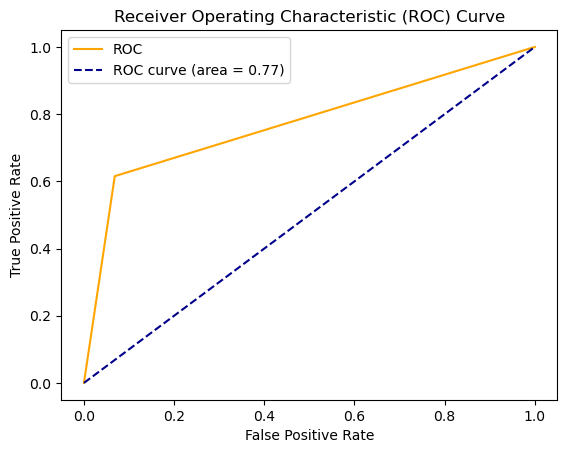

In [55]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()